In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
path_to_reg_mapes = '../stage_3/output_data/'


In [3]:
## Load global 
g_mape = np.load(path_to_reg_mapes+f"fcov_GL_mseStart_global_mape.npy")
g_grad_mape = np.load(path_to_reg_mapes+f"fcov_GL_mseStart_global_grad_mape.npy")

In [4]:
## Load mapes for models to compare
regularized_model_ids = [
    '10', 
    '9p5', 
    '9', 
    '8p5', 
    '8', '7p5', '7', '6p5', '6', '5p5', '5', '4p5', '4', '3p5', '3', '2p5', '2', '1p5', '1']

reg_mapes = []

for _id in regularized_model_ids:
    reg_mapes.append(np.load(path_to_reg_mapes+f"fcov_GL_mseStart_gPAStdOn{_id}_mape.npy"))
    

reg_mapes = np.array(reg_mapes)

In [5]:
reg_grad_mapes = []

for _id in regularized_model_ids:
    reg_grad_mapes.append(np.load(path_to_reg_mapes+f"fcov_GL_mseStart_gPAStdOn{_id}_grad_mape.npy"))
    

reg_grad_mapes = np.array(reg_grad_mapes)

In [6]:
reg_mapes = np.concatenate((g_mape[None, :], reg_mapes))
reg_mapes.shape

(20, 214)

In [7]:
reg_grad_mapes = np.concatenate((g_grad_mape[None, :], reg_grad_mapes))


In [8]:
path_to_mse_mape = "../stage_1/output_data/"

mse_mape = np.load(path_to_mse_mape+"mse_5l_i123_c32s_padR_schLrG0p95_reg0_mape.npy")
mse_grad_mape = np.load(path_to_mse_mape+"mse_5l_i123_c32s_padR_schLrG0p95_reg0_grad_mape.npy")

In [9]:
reg_mapes = reg_mapes - mse_mape[None, :]
reg_grad_mapes = reg_grad_mapes - mse_grad_mape[None, :]

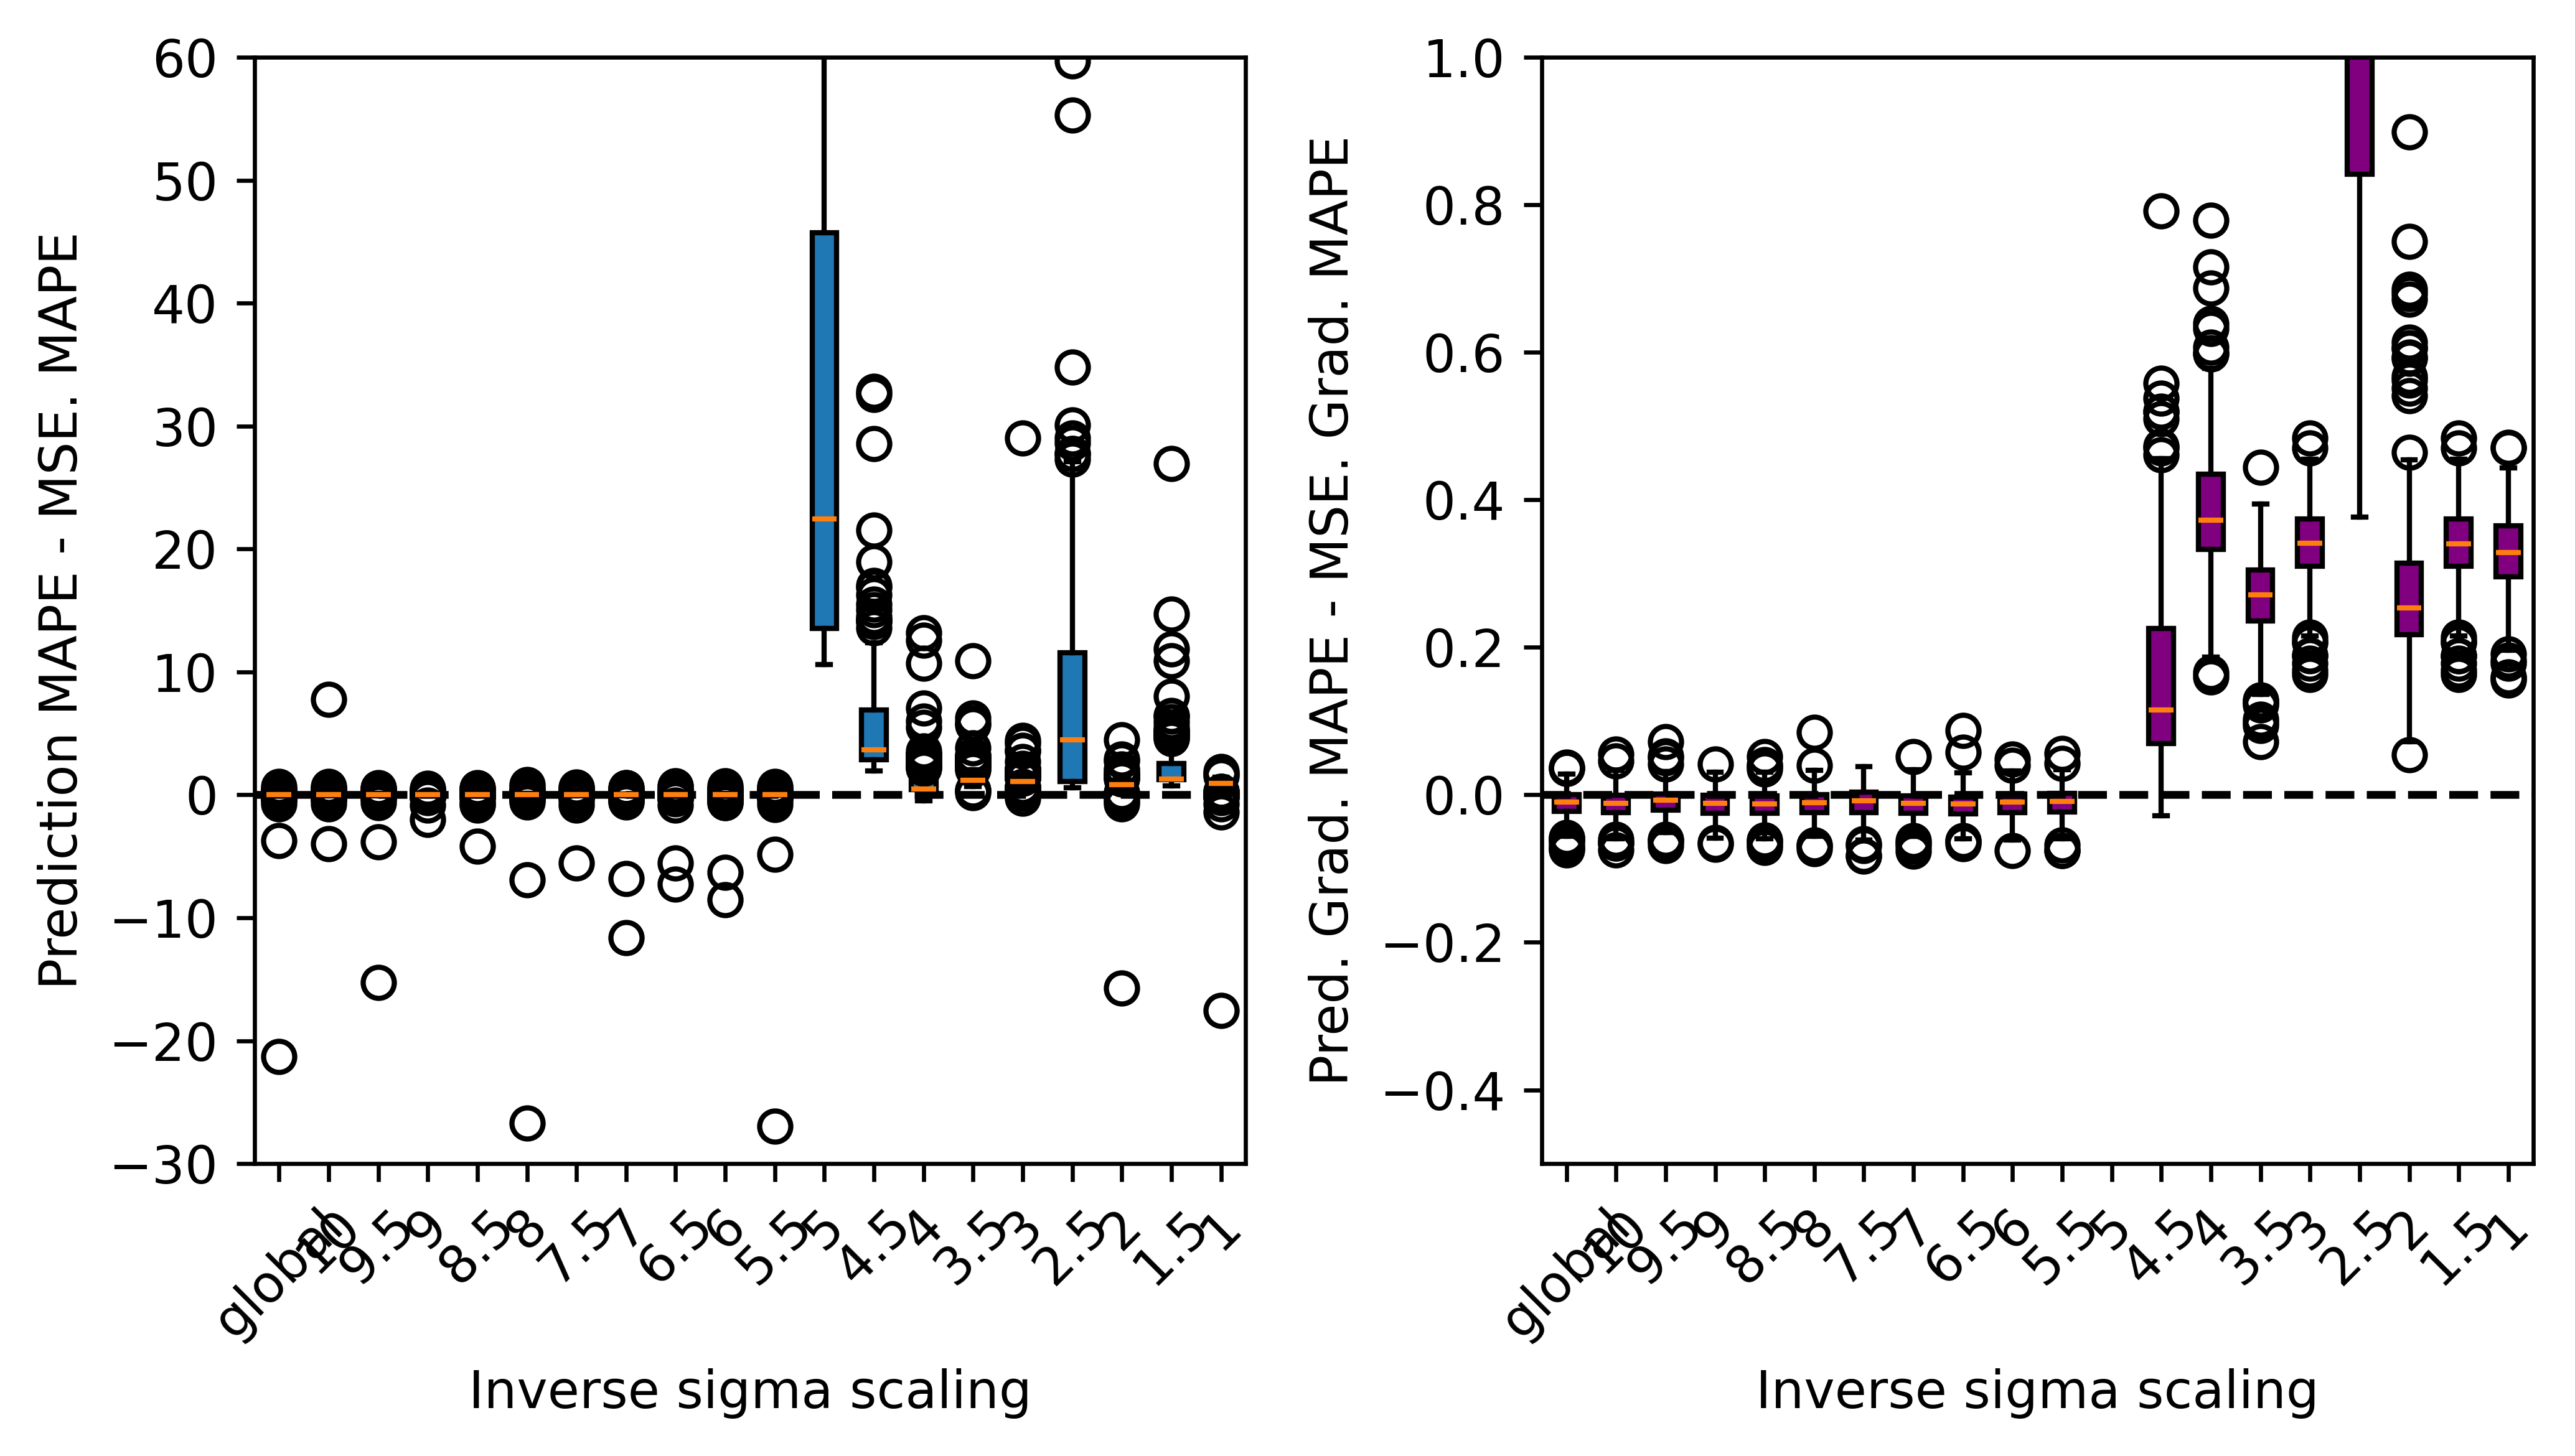

In [11]:
fig, ax = plt.subplots(1, 2, dpi=600, figsize=(1.0*np.array([7, 4])))


boxplot = ax[0].boxplot(
    # pred_gm_mapes - inte_gm_mapes, 
    reg_mapes.T,
    notch=False,         # Notch shape on the boxes
    vert=True,           # Vertical boxes
    patch_artist=True,   # Fill the boxes with color
    showfliers=True)     # Show outliers

# fill with colors
for i, patch in enumerate(boxplot['boxes']):
    # if i == len(boxplot['boxes'])-1:
    #     patch.set_facecolor('green')
    # else:
    patch.set_facecolor('C0')

# Customizing the plot
# ax[0].set_title('Box Plot with Whiskers and Outliers')
ax[0].set_ylabel('Prediction MAPE - MSE. MAPE')
# ax.set_xticks([0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 1.0])
# ax[0].set_xticklabels([0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 'MSE'])
# for tick_label in ax[0].get_xticklabels()[:5]:
#     tick_label.set_rotation(45)  # Rotate by 45 degrees
#     tick_label.set_ha('center')   # Align labels to the right
_yscale = 600
ax[0].set_ylim([-0.05*_yscale, 0.10*_yscale])

ax[0].hlines(0, *ax[0].get_xlim(), ls='--', color='k')


boxplot = ax[1].boxplot(
    # pred_gm_mapes - inte_gm_mapes, 
    reg_grad_mapes.T,
    # color='green',
    notch=False,         # Notch shape on the boxes
    vert=True,           # Vertical boxes
    patch_artist=True,   # Fill the boxes with color
    showfliers=True)     # Show outliers

# fill with colors
for i, patch in enumerate(boxplot['boxes']):
    # if i == len(boxplot['boxes'])-1:
    #     patch.set_facecolor('green')
    # else:
    patch.set_facecolor('purple')

# Customizing the plot
# ax[1].set_title('Box Plot with Whiskers and Outliers')
ax[1].set_ylabel('Pred. Grad. MAPE - MSE. Grad. MAPE')
# ax.set_xticks([0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 1.0])
for _ax in ax:
    _ax.set_xlabel(r'Inverse sigma scaling')
    _ax.set_xticklabels(
        ['global']+ [val.replace('p', '.') for val in regularized_model_ids]
        )
    for tick_label in _ax.get_xticklabels()[0:]:
        tick_label.set_rotation(45)  # Rotate by 45 degrees
        tick_label.set_ha('center')   # Align labels to the right
_yscale1 = .25
ax[1].set_ylim([-2*_yscale1, 4*_yscale1])

ax[1].hlines(0, *ax[1].get_xlim(), ls='--', color='k')

plt.tight_layout()

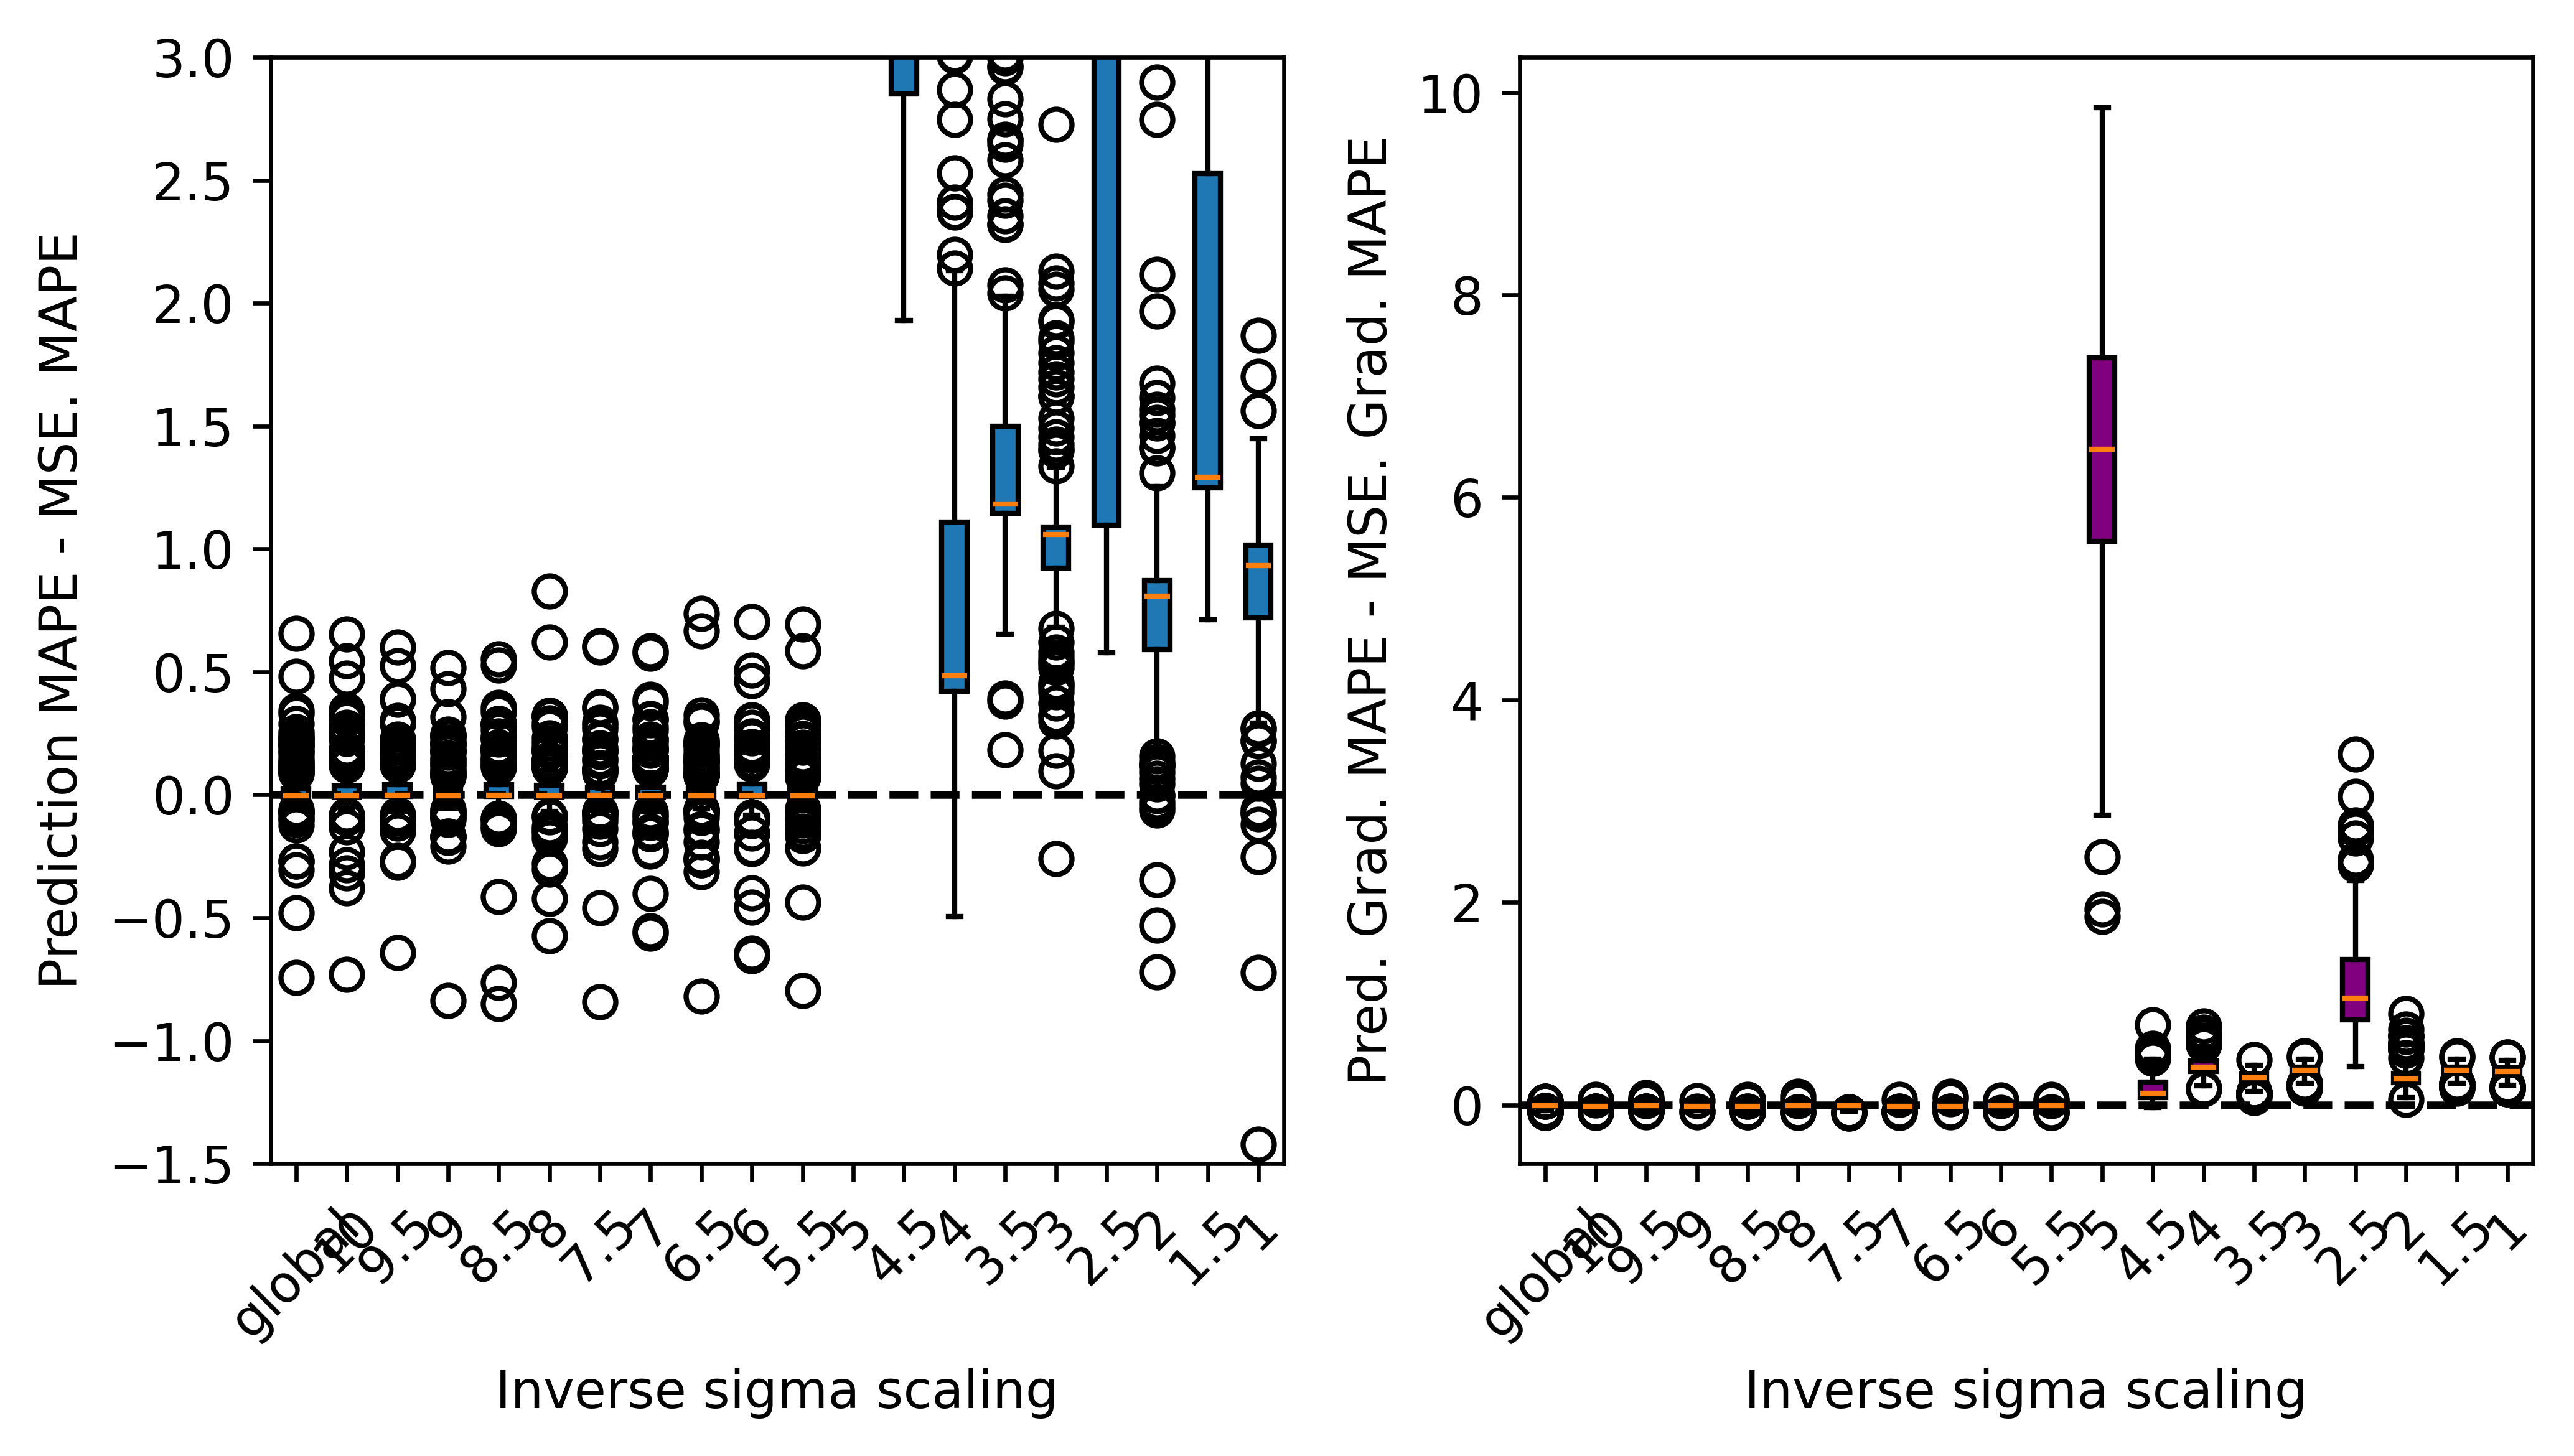

In [12]:
fig, ax = plt.subplots(1, 2, dpi=600, figsize=(1.0*np.array([7, 4])))


boxplot = ax[0].boxplot(
    # pred_gm_mapes - inte_gm_mapes, 
    reg_mapes.T,
    notch=False,         # Notch shape on the boxes
    vert=True,           # Vertical boxes
    patch_artist=True,   # Fill the boxes with color
    showfliers=True)     # Show outliers

# fill with colors
for i, patch in enumerate(boxplot['boxes']):
    # if i == len(boxplot['boxes'])-1:
    #     patch.set_facecolor('green')
    # else:
    patch.set_facecolor('C0')

# Customizing the plot
# ax[0].set_title('Box Plot with Whiskers and Outliers')
ax[0].set_ylabel('Prediction MAPE - MSE. MAPE')
# ax.set_xticks([0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 1.0])
# ax[0].set_xticklabels([0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 'MSE'])
# for tick_label in ax[0].get_xticklabels()[:5]:
#     tick_label.set_rotation(45)  # Rotate by 45 degrees
#     tick_label.set_ha('center')   # Align labels to the right
_yscale = 30
ax[0].set_ylim([-0.05*_yscale, 0.10*_yscale])

ax[0].hlines(0, *ax[0].get_xlim(), ls='--', color='k')


boxplot = ax[1].boxplot(
    # pred_gm_mapes - inte_gm_mapes, 
    reg_grad_mapes.T,
    # color='green',
    notch=False,         # Notch shape on the boxes
    vert=True,           # Vertical boxes
    patch_artist=True,   # Fill the boxes with color
    showfliers=True)     # Show outliers

# fill with colors
for i, patch in enumerate(boxplot['boxes']):
    # if i == len(boxplot['boxes'])-1:
    #     patch.set_facecolor('green')
    # else:
    patch.set_facecolor('purple')

# Customizing the plot
# ax[1].set_title('Box Plot with Whiskers and Outliers')
ax[1].set_ylabel('Pred. Grad. MAPE - MSE. Grad. MAPE')
# ax.set_xticks([0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 1.0])
for _ax in ax:
    _ax.set_xlabel(r'Inverse sigma scaling')
    _ax.set_xticklabels(
        ['global']+ [val.replace('p', '.') for val in regularized_model_ids]
        )
    for tick_label in _ax.get_xticklabels()[0:]:
        tick_label.set_rotation(45)  # Rotate by 45 degrees
        tick_label.set_ha('center')   # Align labels to the right
_yscale1 = .25
# ax[1].set_ylim([-2*_yscale1, 4*_yscale1])

ax[1].hlines(0, *ax[1].get_xlim(), ls='--', color='k')

plt.tight_layout()

Text(0, 0.5, 'Pred. Grad. MAPE - MSE. Grad. MAPE')

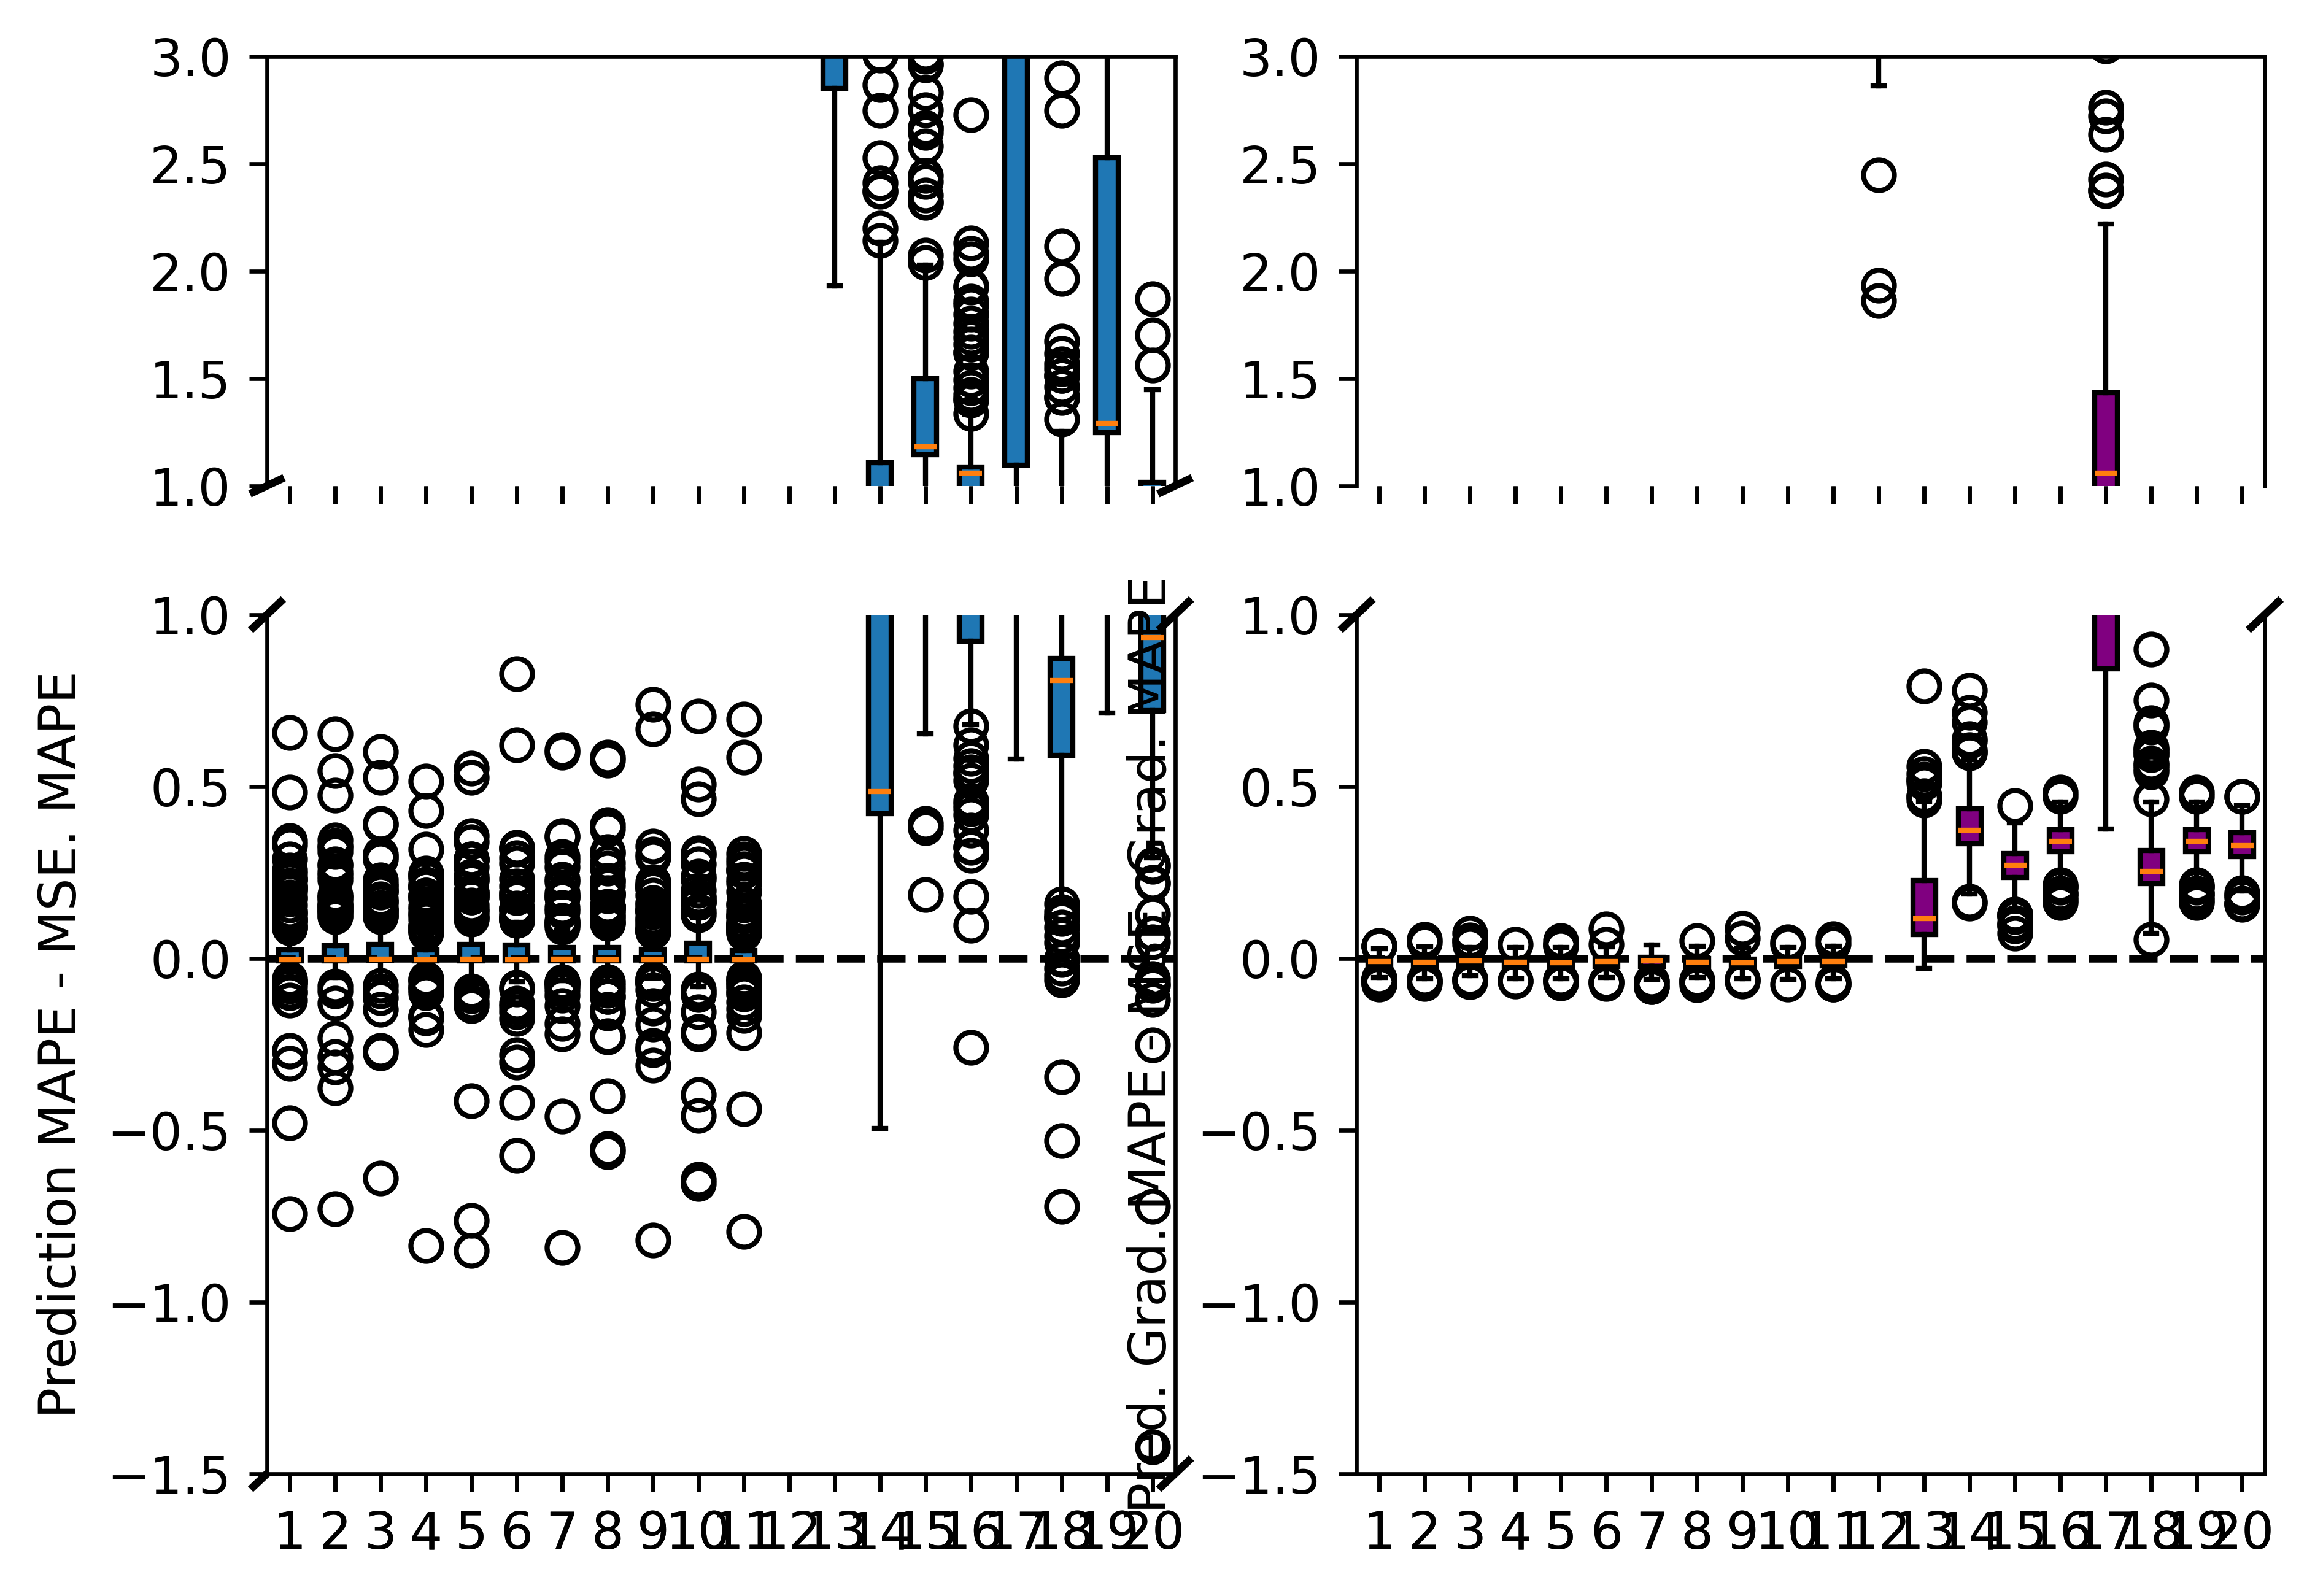

In [13]:
import matplotlib.pyplot as plt

# Create 2 subplots, each with a broken y-axis (2 rows x 2 columns grid)
fig, axs = plt.subplots(2, 2, dpi=600, figsize=(1.0*np.array([7, 5])), sharex='col',
                        gridspec_kw={'height_ratios': [1, 2]})  # top:zoom, bottom:bulk

# Unpack axes
(ax0_top, ax1_top), (ax0_bot, ax1_bot) = axs

# Plot left subplot (regular MAPE)
boxplot0_top = ax0_top.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)
boxplot0_bot = ax0_bot.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)

for patch in boxplot0_top['boxes']:
    patch.set_facecolor('C0')
for patch in boxplot0_bot['boxes']:
    patch.set_facecolor('C0')

# Plot right subplot (gradient MAPE)
boxplot1_top = ax1_top.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)
boxplot1_bot = ax1_bot.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)

for patch in boxplot1_top['boxes']:
    patch.set_facecolor('purple')
for patch in boxplot1_bot['boxes']:
    patch.set_facecolor('purple')

# Set y-limits for broken axis
ax0_top.set_ylim(1.0, 3.0)
ax0_bot.set_ylim(-1.5, 1.0)
ax1_top.set_ylim(1.0, 3.0)
ax1_bot.set_ylim(-1.5, 1.0)

# Hide spines and ticks between axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    ax_top.spines['bottom'].set_visible(False)
    ax_bot.spines['top'].set_visible(False)
    ax_top.tick_params(labelbottom=False)
    ax_bot.xaxis.tick_bottom()

# Diagonal lines
d = .015
kwargs = dict(transform=ax0_top.transAxes, color='k', clip_on=False)
for (top, bot) in [(ax0_top, ax0_bot), (ax1_top, ax1_bot)]:
    top.plot((-d, +d), (-d, +d), **kwargs)
    top.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=bot.transAxes)
    bot.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    bot.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Add horizontal lines at y=0
for ax in [ax0_bot, ax1_bot]:
    ax.hlines(0, *ax.get_xlim(), ls='--', color='k')

# Set labels
ax0_bot.set_ylabel('Prediction MAPE - MSE. MAPE')
ax1_bot.set_ylabel('Pred. Grad. MAPE - MSE. Grad. MAPE')

# for ax in [ax0_bot, ax1_bot]:
#     ax.set_xlabel(r'Inverse sigma scaling')
#     ax.set_xticklabels(['global'] + [val.replace('p', '.') for val in regularized_model_ids])
#     for tick_label in ax.get_xticklabels():
#         tick_label.set_rotation(45)
#         tick_label.set_ha('center')

# plt.tight_layout()


In [14]:
regularized_model_ids

['10',
 '9p5',
 '9',
 '8p5',
 '8',
 '7p5',
 '7',
 '6p5',
 '6',
 '5p5',
 '5',
 '4p5',
 '4',
 '3p5',
 '3',
 '2p5',
 '2',
 '1p5',
 '1']

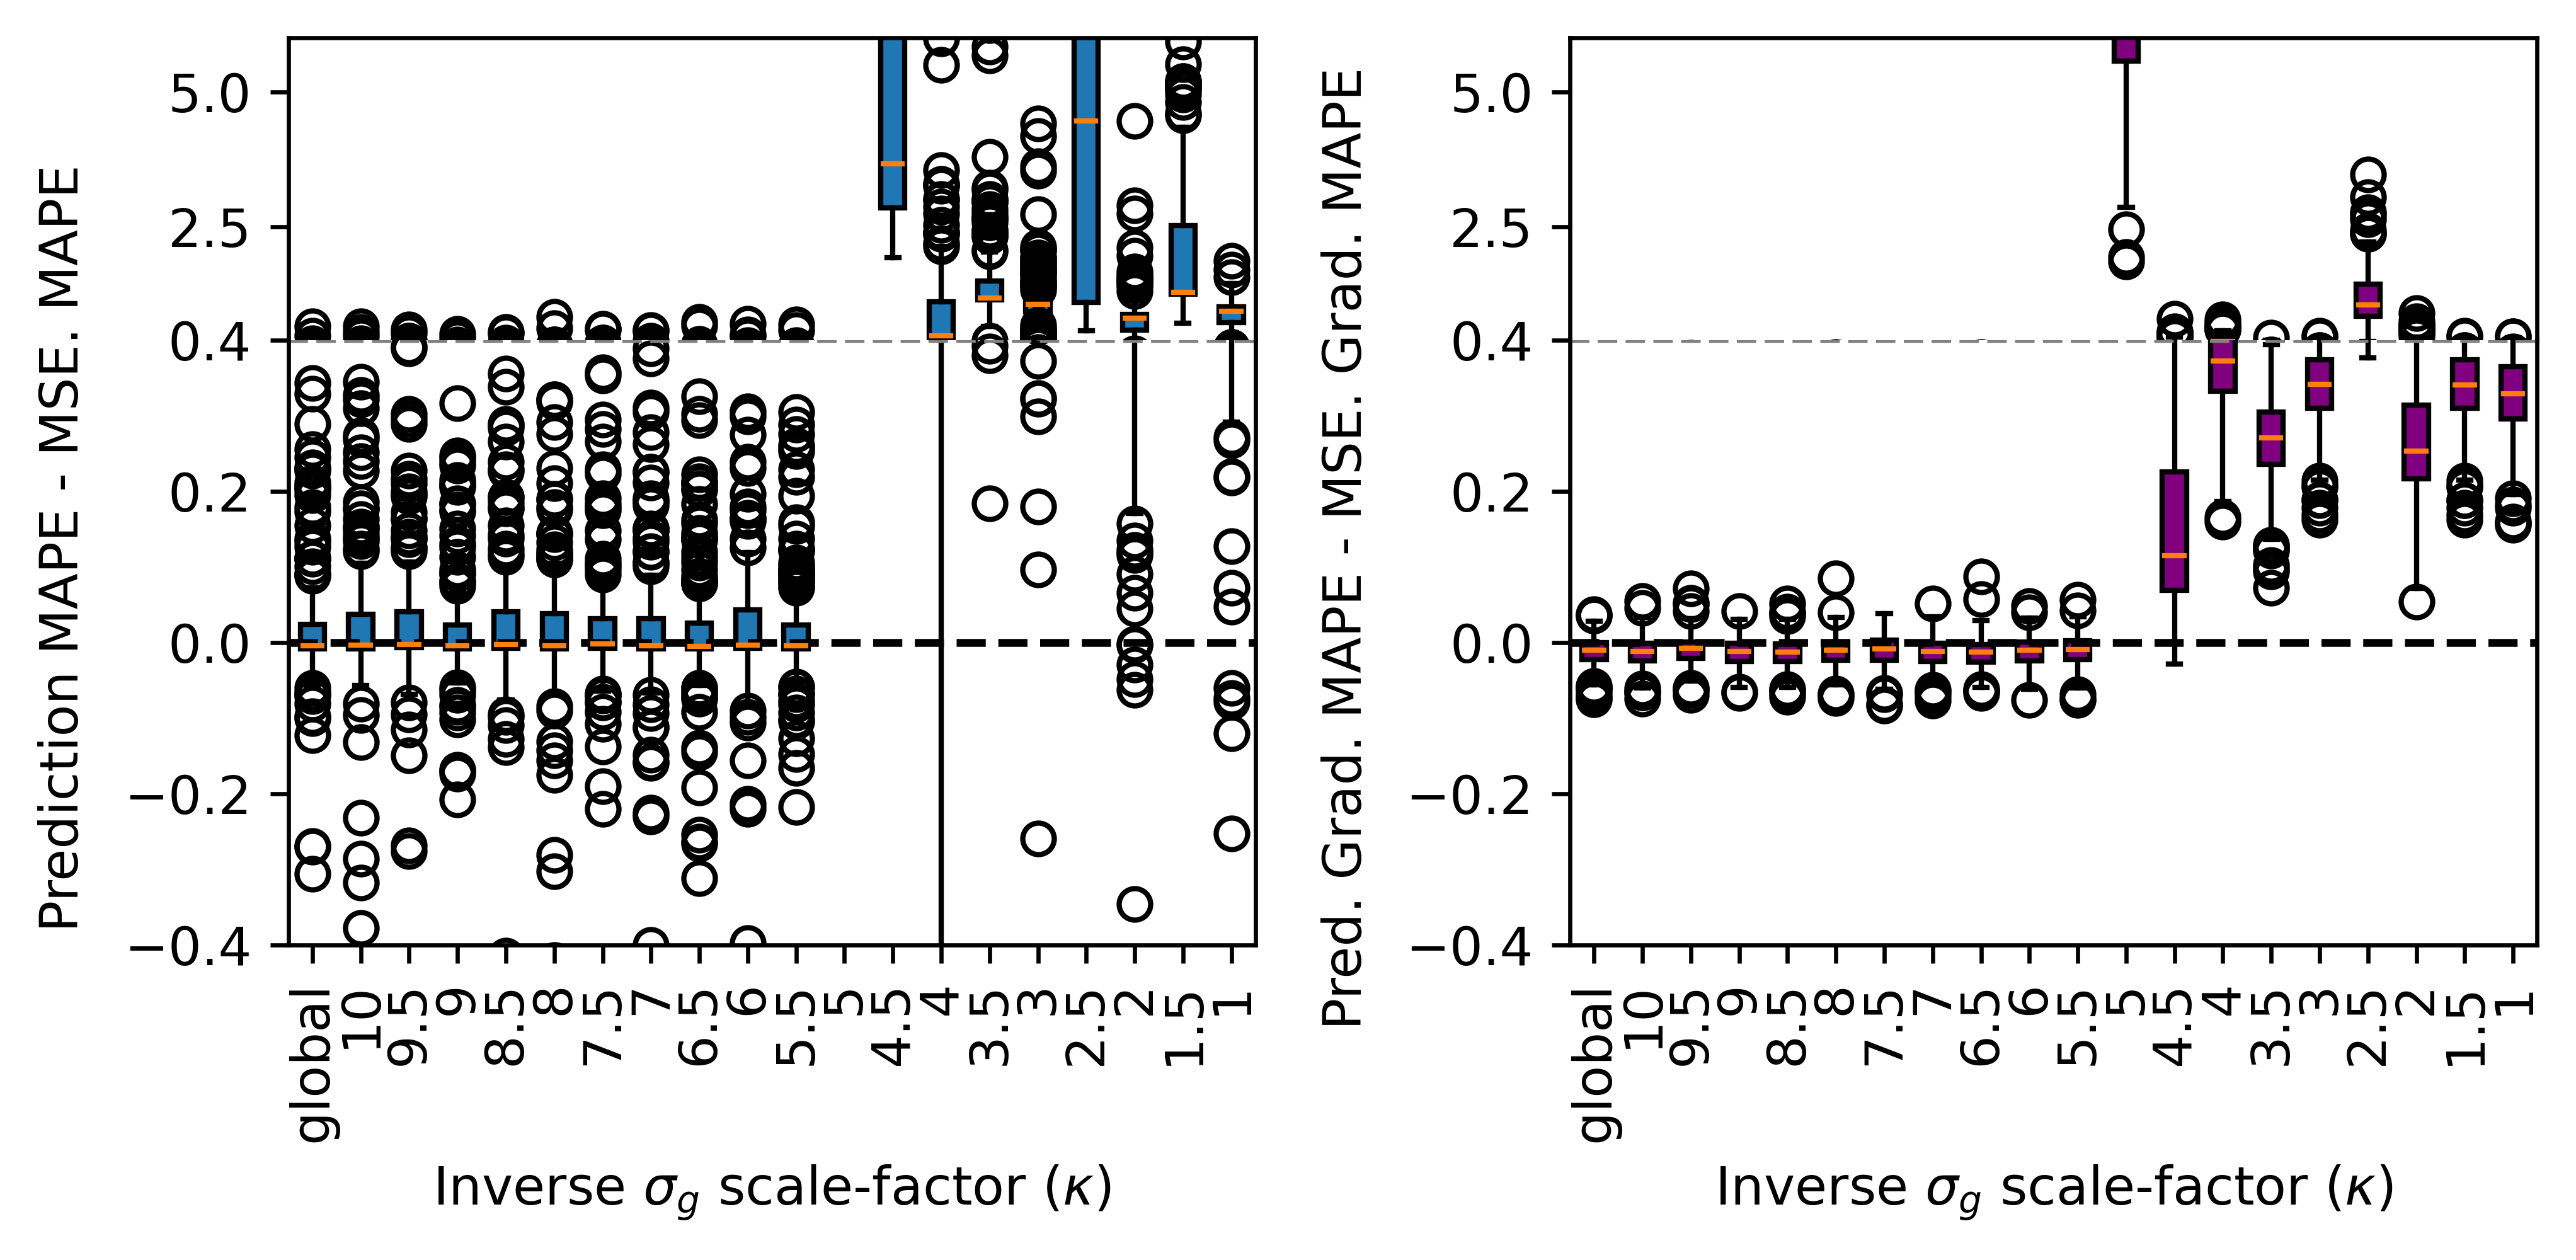

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Create 2x2 subplot grid: top (outliers), bottom (main data), for both plots
fig = plt.figure(dpi=600, figsize=(7, 3))  # adjust size as needed

# Create a 2x2 grid with zero height gap
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 2], hspace=0.0)

ax0_top = fig.add_subplot(gs[0, 0])
ax0_bot = fig.add_subplot(gs[1, 0], sharex=ax0_top)

ax1_top = fig.add_subplot(gs[0, 1])
ax1_bot = fig.add_subplot(gs[1, 1], sharex=ax1_top)

# (ax0_top, ax1_top), (ax0_bot, ax1_bot) = axs

# Boxplots for left side
boxplot0_top = ax0_top.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)
boxplot0_bot = ax0_bot.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)

for patch in boxplot0_top['boxes']:
    patch.set_facecolor('C0')
for patch in boxplot0_bot['boxes']:
    patch.set_facecolor('C0')

# Boxplots for right side
boxplot1_top = ax1_top.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)
boxplot1_bot = ax1_bot.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)

for patch in boxplot1_top['boxes']:
    patch.set_facecolor('purple')
for patch in boxplot1_bot['boxes']:
    patch.set_facecolor('purple')

# Set y-limits for broken axes
ax0_top.set_ylim(0.4, 6.0)
ax0_bot.set_ylim(-0.4, 0.4)

ax1_top.set_ylim(0.4, 6.0)
ax1_bot.set_ylim(-0.4, 0.4)

# Hide spines between axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    ax_top.spines['bottom'].set_visible(False)
    ax_bot.spines['top'].set_visible(False)
    ax_top.tick_params(labelbottom=False)
    ax_bot.xaxis.tick_bottom()

# Draw dashed separator line between top and bottom axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    # get x limits in data coordinates
    xlim = ax_top.get_xlim()
    # draw dashed line on top of lower plot to indicate break
    ax_bot.plot(xlim, [ax_top.get_ylim()[0]]*2, ls='--', color='gray', lw=1)
    # sync xlim just in case
    ax_top.set_xlim(xlim)
    ax_bot.set_xlim(xlim)

# Horizontal lines at y=0
for ax in [ax0_bot, ax1_bot]:
    ax.hlines(0, *ax.get_xlim(), ls='--', color='k')

# Set labels
# ax0_bot.set_ylabel('Prediction MAPE - MSE. MAPE')
# ax1_bot.set_ylabel('Pred. Grad. MAPE - MSE. Grad. MAPE')
fig.text(0.045, 0.5, 'Prediction MAPE - MSE. MAPE', ha='center', va='center', rotation='vertical')
fig.text(0.53, 0.5, 'Pred. Grad. MAPE - MSE. Grad. MAPE', ha='center', va='center', rotation='vertical')


# for ax in [ax0_bot, ax1_bot]:
#     ax.set_xlabel(r'Inverse sigma scaling')
#     ax.set_xticklabels(['global'] + [val.replace('p', '.') for val in regularized_model_ids])
#     for tick_label in ax.get_xticklabels():
#         tick_label.set_rotation(45)
#         tick_label.set_ha('center')
# Define your custom tick labels
tick_labels = ['global'] + [val.replace('p', '.') for val in regularized_model_ids]
tick_positions = list(np.arange(len(tick_labels))+1)  # one per boxplot column

for ax in [ax0_bot, ax1_bot]:
    ax.set_xlabel(r'Inverse $\sigma_g$ scale-factor ($\kappa$)')
    ax.set_xticks(tick_positions)  # Set correct number of tick positions
    ax.set_xticklabels(tick_labels, rotation=90, ha='center')

# plt.tight_layout()

plt.subplots_adjust(
    left=0.13,   # more space on the left if needed
    right=0.98,  # allow more room on the right
    bottom=0.15, # space for rotated xticklabels
    top=0.95,    # top padding
    wspace=0.325,  # horizontal space between left and right subplots
    hspace=0.0   # no space between top and bottom subplots (for broken axis)
)


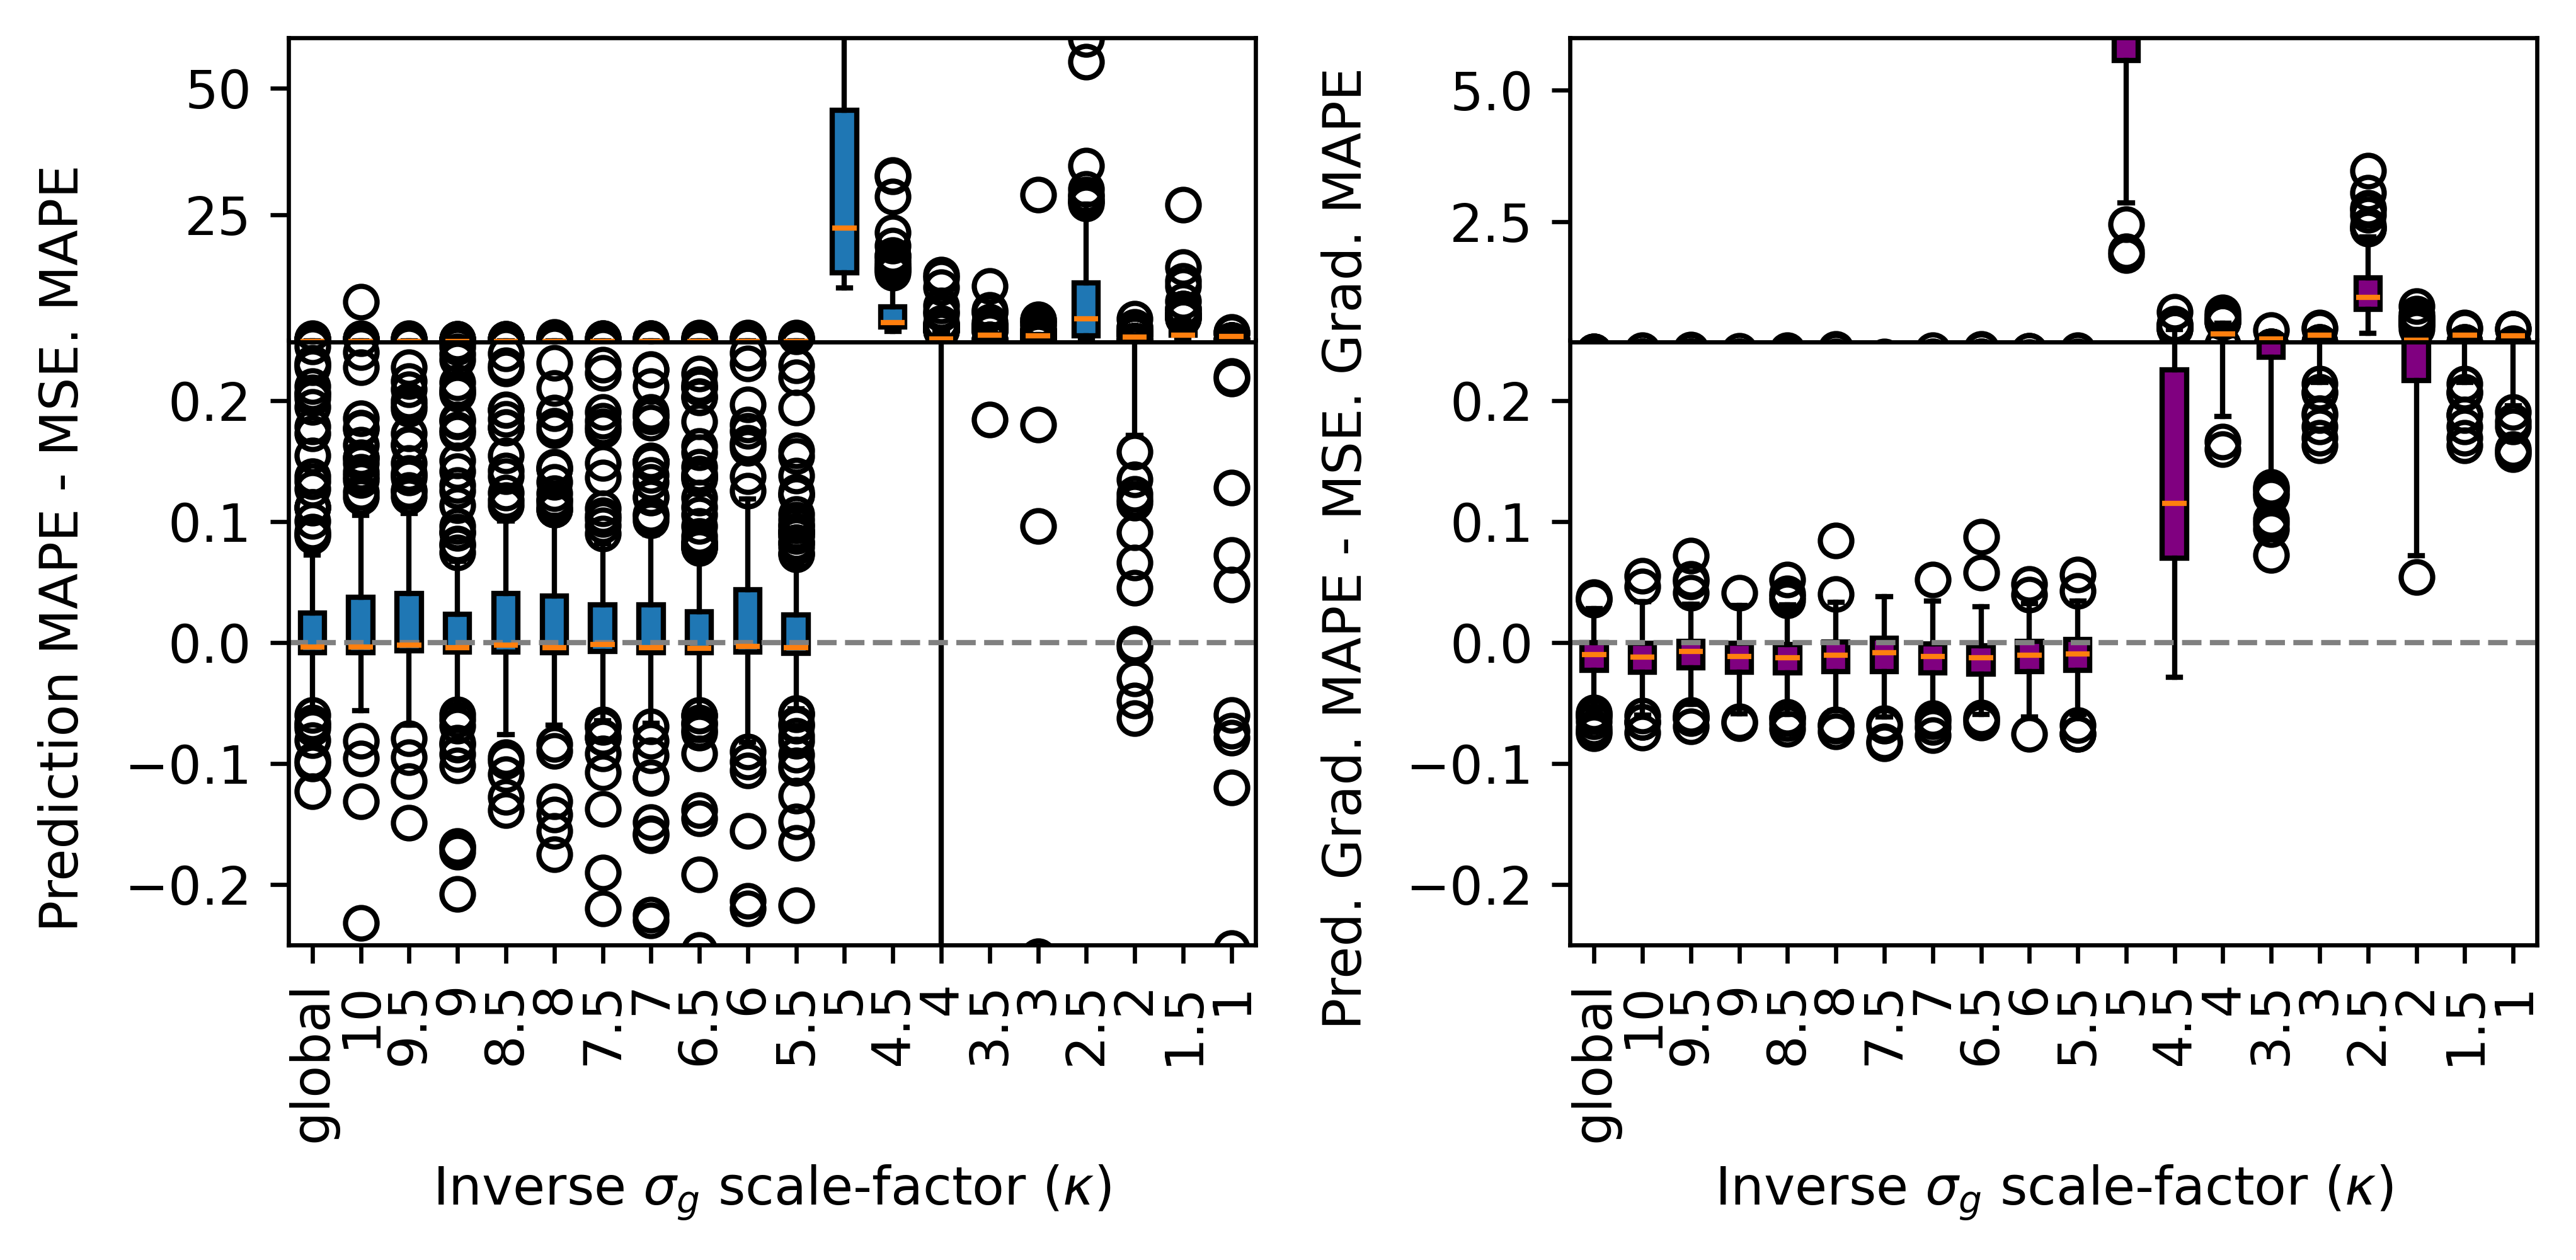

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Create 2x2 subplot grid: top (outliers), bottom (main data), for both plots
fig = plt.figure(dpi=600, figsize=(7, 3))  # adjust size as needed

# Create a 2x2 grid with zero height gap
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 2], hspace=0.0)

ax0_top = fig.add_subplot(gs[0, 0])
ax0_bot = fig.add_subplot(gs[1, 0], sharex=ax0_top)

ax1_top = fig.add_subplot(gs[0, 1])
ax1_bot = fig.add_subplot(gs[1, 1], sharex=ax1_top)

# (ax0_top, ax1_top), (ax0_bot, ax1_bot) = axs

# Boxplots for left side
boxplot0_top = ax0_top.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)
boxplot0_bot = ax0_bot.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)

for patch in boxplot0_top['boxes']:
    patch.set_facecolor('C0')
for patch in boxplot0_bot['boxes']:
    patch.set_facecolor('C0')

# Boxplots for right side
boxplot1_top = ax1_top.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)
boxplot1_bot = ax1_bot.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True)

for patch in boxplot1_top['boxes']:
    patch.set_facecolor('purple')
for patch in boxplot1_bot['boxes']:
    patch.set_facecolor('purple')

# Set y-limits for broken axes
break_point = 0.25
ax0_top.set_ylim(break_point, 60.0)
ax0_bot.set_ylim(-0.25, break_point)

ax1_top.set_ylim(break_point, 6.0)
ax1_bot.set_ylim(-0.25, break_point)

# Hide spines between axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    ax_top.spines['bottom'].set_visible(False)
    ax_bot.spines['top'].set_visible(False)
    ax_top.tick_params(labelbottom=False)
    ax_bot.xaxis.tick_bottom()

# Draw dashed separator line between top and bottom axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    # get x limits in data coordinates
    xlim = ax_top.get_xlim()
    # draw dashed line on top of lower plot to indicate break
    ax_bot.plot(xlim, [ax_top.get_ylim()[0]]*2, ls='-', color='k', lw=1.5)
    # sync xlim just in case
    ax_top.set_xlim(xlim)
    ax_bot.set_xlim(xlim)

# Horizontal lines at y=0
for ax in [ax0_bot, ax1_bot]:
    ax.hlines(0, *ax.get_xlim(), ls='--', lw=1, color='gray')

# Set labels
# ax0_bot.set_ylabel('Prediction MAPE - MSE. MAPE')
# ax1_bot.set_ylabel('Pred. Grad. MAPE - MSE. Grad. MAPE')
fig.text(0.045, 0.5, 'Prediction MAPE - MSE. MAPE', ha='center', va='center', rotation='vertical')
fig.text(0.53, 0.5, 'Pred. Grad. MAPE - MSE. Grad. MAPE', ha='center', va='center', rotation='vertical')


# for ax in [ax0_bot, ax1_bot]:
#     ax.set_xlabel(r'Inverse sigma scaling')
#     ax.set_xticklabels(['global'] + [val.replace('p', '.') for val in regularized_model_ids])
#     for tick_label in ax.get_xticklabels():
#         tick_label.set_rotation(45)
#         tick_label.set_ha('center')
# Define your custom tick labels
tick_labels = ['global'] + [val.replace('p', '.') for val in regularized_model_ids]
tick_positions = list(np.arange(len(tick_labels))+1)  # one per boxplot column

for ax in [ax0_bot, ax1_bot]:
    ax.set_xlabel(r'Inverse $\sigma_g$ scale-factor ($\kappa$)')
    ax.set_xticks(tick_positions)  # Set correct number of tick positions
    ax.set_xticklabels(tick_labels, rotation=90, ha='center')
    # bot_ticks = list(ax.get_yticks())
    # if break_point not in bot_ticks:
    #     bot_ticks.append(break_point)
    #     bot_ticks = sorted(bot_ticks)
    # ax.set_yticks(bot_ticks)

# plt.tight_layout()

plt.subplots_adjust(
    left=0.13,   # more space on the left if needed
    right=0.98,  # allow more room on the right
    bottom=0.15, # space for rotated xticklabels
    top=0.95,    # top padding
    wspace=0.325,  # horizontal space between left and right subplots
    hspace=0.0   # no space between top and bottom subplots (for broken axis)
)




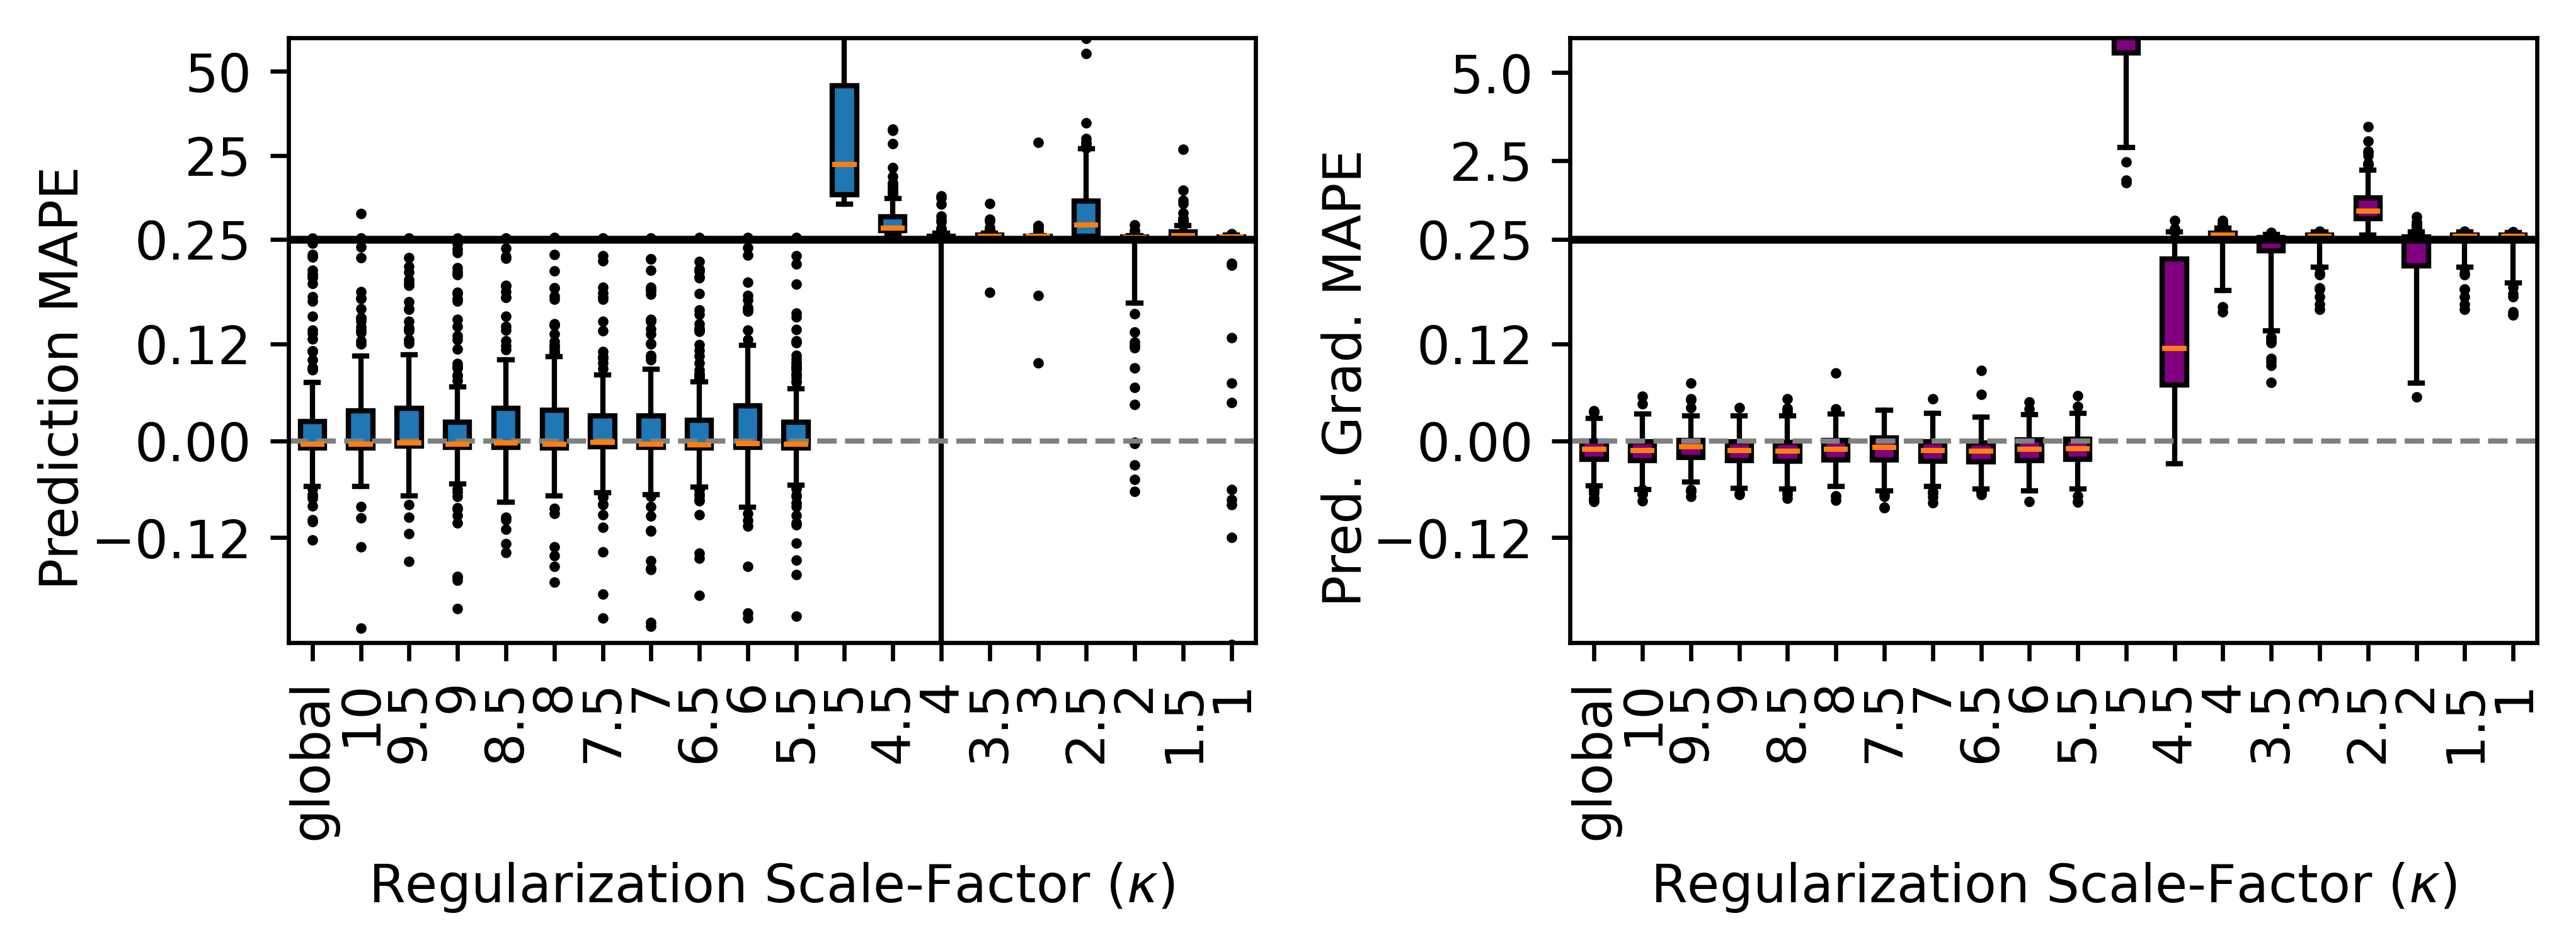

In [39]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Create 2x2 subplot grid: top (outliers), bottom (main data), for both plots
fig = plt.figure(dpi=600, figsize=(7, 2))  # adjust size as needed

# Create a 2x2 grid with zero height gap
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 2], hspace=0.0)

ax0_top = fig.add_subplot(gs[0, 0])
ax0_bot = fig.add_subplot(gs[1, 0], sharex=ax0_top)

ax1_top = fig.add_subplot(gs[0, 1])
ax1_bot = fig.add_subplot(gs[1, 1], sharex=ax1_top)

# (ax0_top, ax1_top), (ax0_bot, ax1_bot) = axs

# Customize the outlier marker
flierprops = dict(marker='.', color='grey', markersize=2)  # 'D' for diamond marker

# Boxplots for left side
boxplot0_top = ax0_top.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True,  flierprops=flierprops)
boxplot0_bot = ax0_bot.boxplot(reg_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True,  flierprops=flierprops)

for patch in boxplot0_top['boxes']:
    patch.set_facecolor('C0')
for patch in boxplot0_bot['boxes']:
    patch.set_facecolor('C0')

# Boxplots for right side
boxplot1_top = ax1_top.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True,  flierprops=flierprops)
boxplot1_bot = ax1_bot.boxplot(reg_grad_mapes.T, notch=False, vert=True, patch_artist=True, showfliers=True,  flierprops=flierprops)

for patch in boxplot1_top['boxes']:
    patch.set_facecolor('purple')
for patch in boxplot1_bot['boxes']:
    patch.set_facecolor('purple')

# Set y-limits for broken axes
break_point = 0.25
ax0_top.set_ylim(break_point, 60.0)
ax0_bot.set_ylim(-0.25, break_point)

ax1_top.set_ylim(break_point, 6.0)
ax1_bot.set_ylim(-0.25, break_point)

# Hide spines between axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    ax_top.spines['bottom'].set_visible(False)
    ax_bot.spines['top'].set_visible(False)
    ax_top.tick_params(labelbottom=False)
    ax_bot.xaxis.tick_bottom()

# Draw dashed separator line between top and bottom axes
for ax_top, ax_bot in zip([ax0_top, ax1_top], [ax0_bot, ax1_bot]):
    # get x limits in data coordinates
    xlim = ax_top.get_xlim()
    # draw dashed line on top of lower plot to indicate break
    ax_top.plot(xlim, [ax_top.get_ylim()[0]]*2, ls='-', color='k', lw=1.5, zorder=4)
    ax_bot.plot(xlim, [ax_top.get_ylim()[0]]*2, ls='-', color='k', lw=1.5, zorder=4)
    
    for ax in [ax_top, ax_bot]:

        # # Get the current x-ticks
        # current_ticks = ax.get_xticks()

        # # Adjust the first tick's position (move it to the left by 0.2 units for example)
        # new_ticks = [current_ticks[0] - 1] + list(current_ticks[1:])

        # ax.set_xticks(new_ticks)

        # sync xlim just in case
        ax.set_xlim(xlim)

# Horizontal lines at y=0
for ax in [ax0_bot, ax1_bot]:
    ax.hlines(0, *ax.get_xlim(), ls='--', lw=1, color='gray')

# Set labels
# ax0_bot.set_ylabel('Prediction MAPE - MSE. MAPE')
# ax1_bot.set_ylabel('Pred. Grad. MAPE - MSE. Grad. MAPE')
fig.text(0.045, 0.5, 'Prediction MAPE', ha='center', va='center', rotation='vertical')
fig.text(0.53, 0.5, 'Pred. Grad. MAPE', ha='center', va='center', rotation='vertical')


# Define your custom tick labels
tick_labels = ['global'] + [val.replace('p', '.') for val in regularized_model_ids]
tick_positions = list(np.arange(len(tick_labels))+1)  # one per boxplot column

for ax in [ax0_bot, ax1_bot]:
    ax.set_xlabel(r'Regularization Scale-Factor ($\kappa$)')
    ax.set_xticks(tick_positions)  # Set correct number of tick positions
    ax.set_xticklabels(tick_labels, rotation=90, ha='center')
    # bot_ticks = list(ax.get_yticks())
    # if break_point not in bot_ticks:
    #     bot_ticks.append(break_point)
    #     bot_ticks = sorted(bot_ticks)
    # ax.set_yticks(bot_ticks)
    _ylims = ax.get_ylim()
    # Get current y-ticks
    current_ticks = ax.get_yticks()
    # Add a new tick at y = 10
    # new_ticks = list(current_ticks) + [break_point]
    new_ticks = [-.12, 0, .12, .25]
    ## Add new ticks
    ax.set_yticks(new_ticks)
    ax.set_ylim(_ylims)

# plt.tight_layout()

plt.subplots_adjust(
    left=0.13,   # more space on the left if needed
    right=0.98,  # allow more room on the right
    bottom=0.15, # space for rotated xticklabels
    top=0.95,    # top padding
    wspace=0.325,  # horizontal space between left and right subplots
    hspace=0.0   # no space between top and bottom subplots (for broken axis)
)


